In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import plotly.express as px
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('tourism_data.csv')

In [3]:
date_range = pd.date_range(start='1960-01-01', freq='Y', periods=len(df))
date_range

DatetimeIndex(['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [4]:
df = pd.DataFrame({'date': date_range, 'Y20': df['Y20'], 'Y152': df['Y152']})
df

,date,Y20,Y152
0,1960-12-31,40671,103880
1,1961-12-31,53075,126331
2,1962-12-31,76141,139227
3,1963-12-31,118008,196868
4,1964-12-31,162363,232397
5,1965-12-31,215060,290503
6,1966-12-31,262354,387609
7,1967-12-31,293761,482969
8,1968-12-31,307367,589066
9,1969-12-31,350017,769908


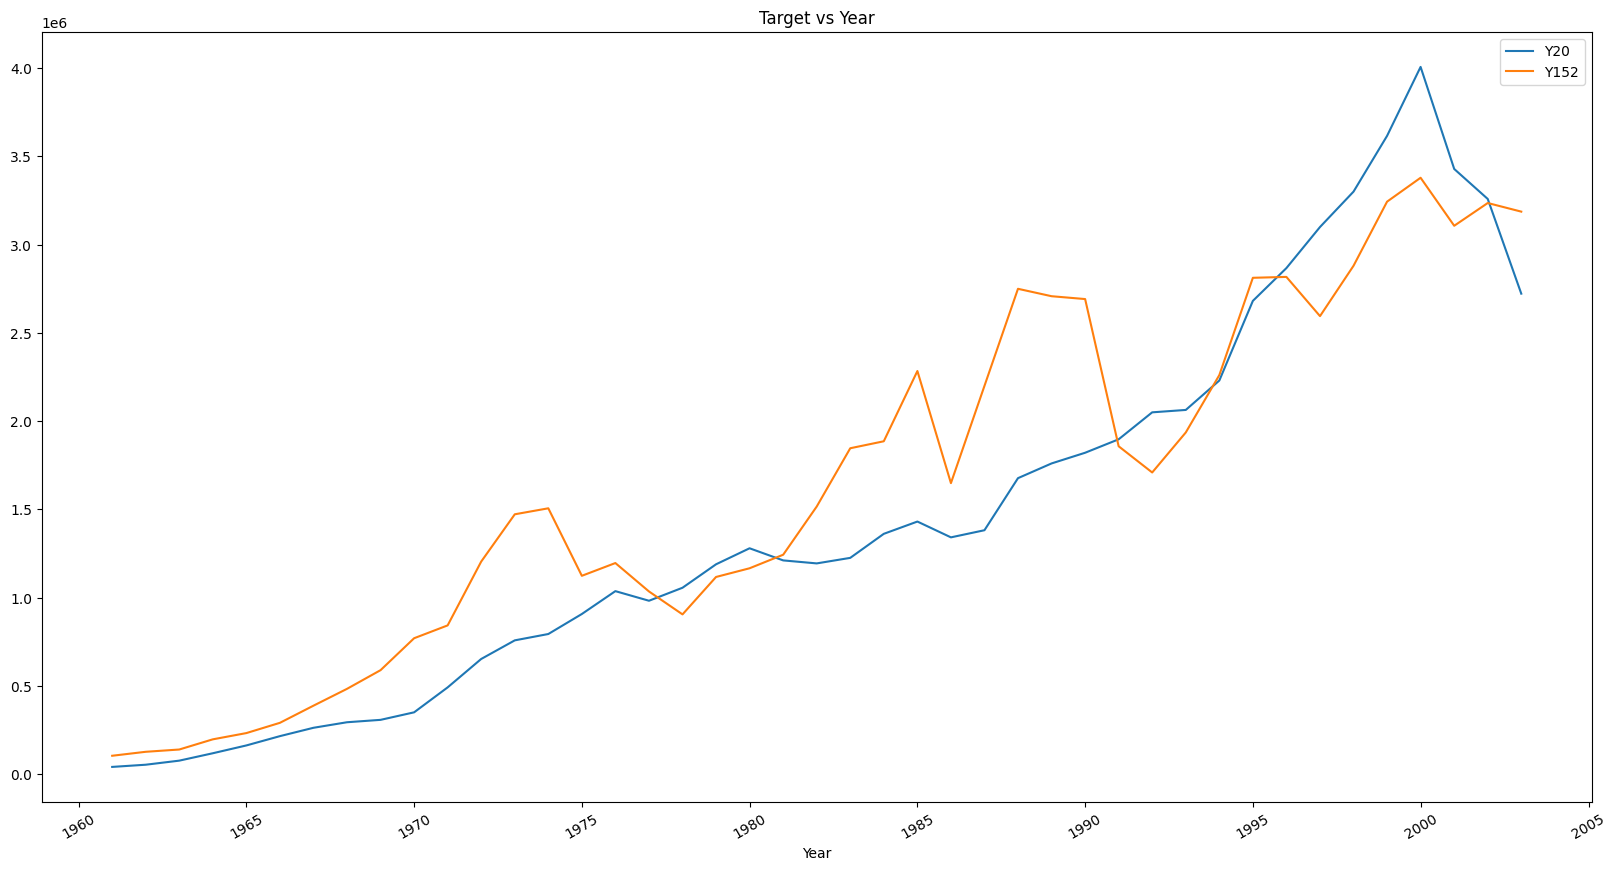

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['Y20'], label='Y20')
plt.plot(df['date'], df['Y152'], label='Y152')
plt.xlabel('Year')
plt.title('Target vs Year')
plt.xticks(rotation=30)
plt.legend()
plt.show()

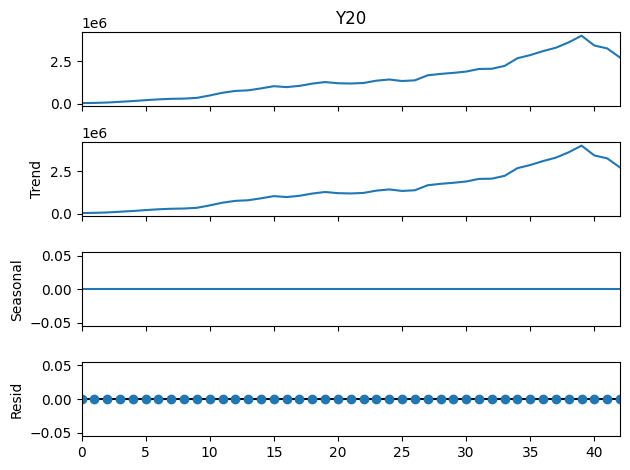

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose, MSTL

decomposition = seasonal_decompose(df['Y20'], model='additive', period=1)
decomposition.plot()
plt.show()

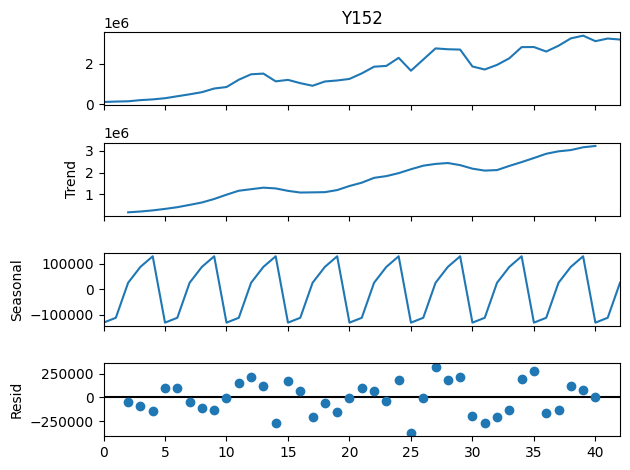

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose, MSTL

decomposition = seasonal_decompose(df['Y152'], model='additive', period=5)
decomposition.plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

# model = ARIMA(df['Y20'], order=(1,1,1))
test = adfuller(df['Y152'])
print('ADF Statistic: %f' % test[0])
print('p-value: %f' % test[1])

ADF Statistic: -0.893007
p-value: 0.790267


In [9]:
# df['Y20_diff'] = df['Y20'] - df['Y20'].shift(1)
df1 = df['Y152'] - df['Y152'].shift(5)

In [10]:
t1 = adfuller(df1.dropna())
print('ADF Statistic: %f' % t1[0])
print('p-value: %f' % t1[1])

ADF Statistic: -5.111976
p-value: 0.000013


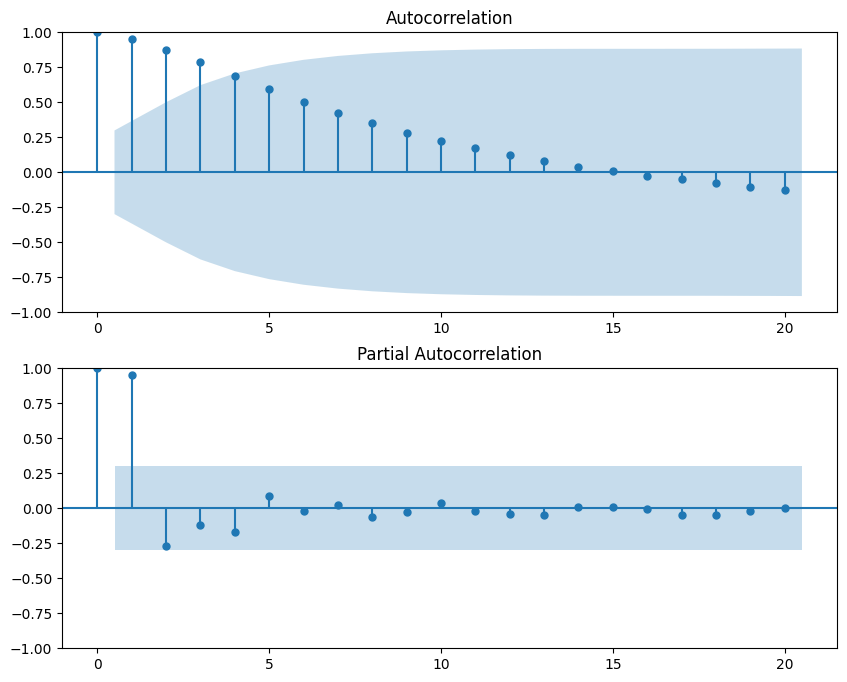

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('ACF and PACF plots')
plot_acf(df['Y20'], lags=20, ax=ax[0])
plot_pacf(df['Y20'], lags=20, ax=ax[1])
plt.show()

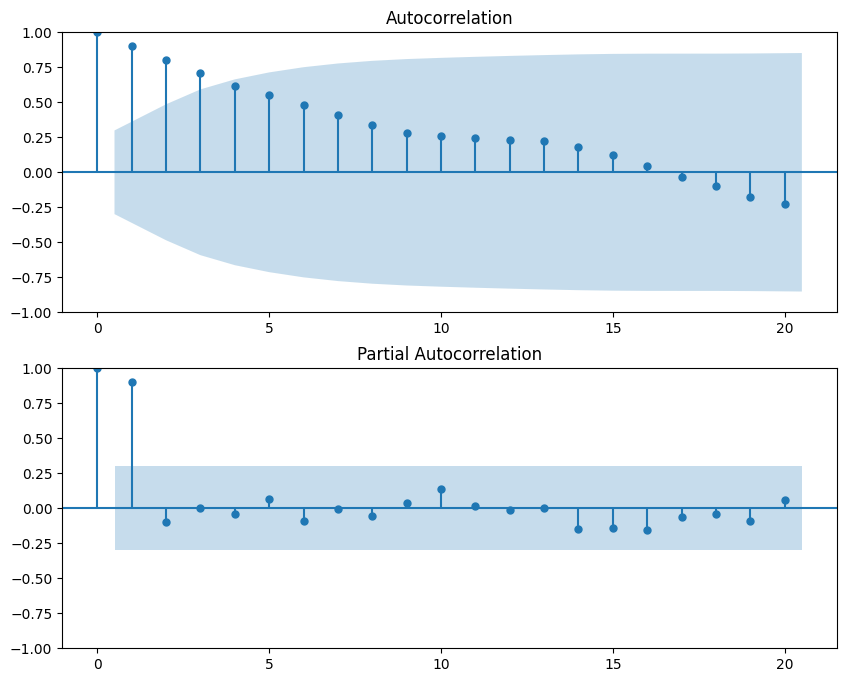

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('ACF and PACF plots')
plot_acf(df['Y152'], lags=20, ax=ax[0])
plot_pacf(df['Y152'], lags=20, ax=ax[1])
plt.show()

In [13]:
train = df[:len(df) - 4]
valid = df[len(df) - 4:]

## Naive Forecast

In [14]:
naive_y20_train = np.concatenate([[np.nan], train['Y20'].values[:-1]])
naive_y152_train = np.concatenate([[np.nan], train['Y152'].values[:-1]])

In [15]:
naive_y20 = np.repeat(train['Y20'].iloc[-1], 4)
naive_y20 = pd.Series(naive_y20, index=valid.index)
naive_y152 = np.repeat(train['Y152'].iloc[-1], 4)
naive_y152 = pd.Series(naive_y152, index=valid.index)

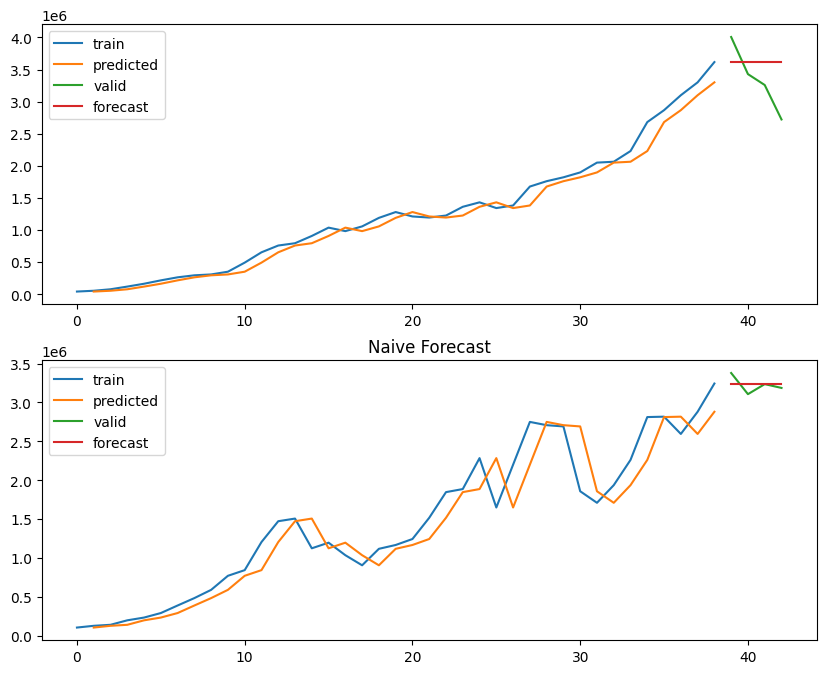

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('Naive Forecast')
ax[0].plot(train['Y20'], label='train')
ax[0].plot(naive_y20_train, label='predicted')
ax[0].plot(valid['Y20'], label='valid')
ax[0].plot(naive_y20, label='forecast')
ax[0].legend()
ax[1].plot(train['Y152'], label='train')
ax[1].plot(naive_y152_train, label='predicted')
ax[1].plot(valid['Y152'], label='valid')
ax[1].plot(naive_y152, label='forecast')
ax[1].legend()
plt.show()

In [17]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


y20_naive_train_mape = mape(train['Y20'][1:], naive_y20_train[1:])
y152_naive_train_mape = mape(train['Y152'][1:], naive_y152_train[1:])
y20_naive_forecast_mape = mape(valid['Y20'], naive_y20)
y152_naive_forecast_mape = mape(valid['Y152'], naive_y152)

In [18]:
print('Y20 naive forecast MAPE: ', y20_naive_forecast_mape)
print('Y20 naive train MAPE: ', y20_naive_train_mape)
print('Y152 naive forecast MAPE: ', y152_naive_forecast_mape)
print('Y152 naive train MAPE: ', y152_naive_train_mape)
mapes = [y20_naive_forecast_mape, y152_naive_forecast_mape, y20_naive_train_mape, y152_naive_train_mape]

Y20 naive forecast MAPE:  14.757780132072615
Y20 naive train MAPE:  11.552918908727575
Y152 naive forecast MAPE:  2.604441944525717
Y152 naive train MAPE:  15.966113372749092


In [19]:
y20_forecast_mase = mean_absolute_error(valid['Y20'], naive_y20) / mean_absolute_error(train['Y20'][1:],
                                                                                       train['Y20'][:-1])
y152_forecast_mase = mean_absolute_error(valid['Y152'], naive_y152) / mean_absolute_error(train['Y152'][1:],
                                                                                          train['Y152'][:-1])
y20_train_mase = (np.abs(train['Y20'] - naive_y20_train).sum() / len(train['Y20'])) / (
            np.abs(train['Y20'] - train['Y20'].shift(1)).sum() / len(train['Y20']))
y152_train_mase = (np.abs(train['Y152'] - naive_y152_train).sum() / len(train['Y152'])) / (
            np.abs(train['Y152'] - train['Y152'].shift(1)).sum() / len(train['Y152']))

In [20]:
print('Y20 naive forecast MASE: ', y20_forecast_mase)
print('Y20 naive train MASE: ', y20_train_mase)
print('Y152 naive forecast MASE: ', y152_forecast_mase)
print('Y152 naive train MASE: ', y152_train_mase)
mases = [y20_forecast_mase, y152_forecast_mase, y20_train_mase, y152_train_mase]

Y20 naive forecast MASE:  4.307816799416224
Y20 naive train MASE:  1.0
Y152 naive forecast MASE:  0.38571926589513184
Y152 naive train MASE:  1.0


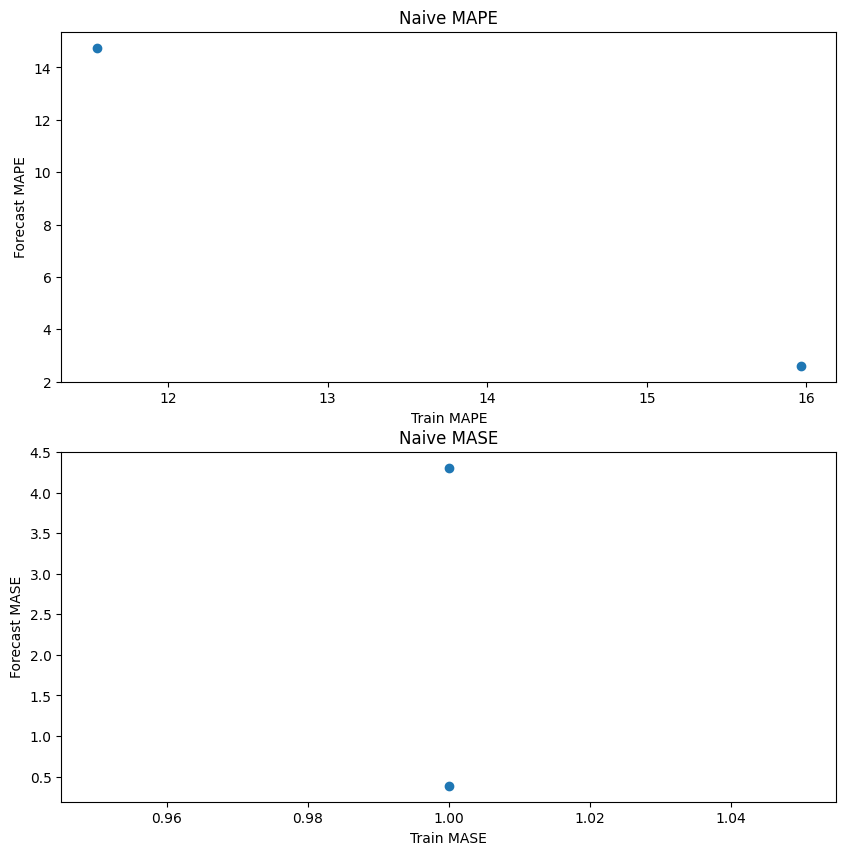

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].scatter(mapes[2:], mapes[:2])
ax[0].set_xlabel('Train MAPE')
ax[0].set_ylabel('Forecast MAPE')
ax[0].set_title('Naive MAPE')
ax[1].scatter(mases[2:], mases[:2])
ax[1].set_xlabel('Train MASE')
ax[1].set_ylabel('Forecast MASE')
ax[1].set_title('Naive MASE')
plt.show()

## ETS

In [22]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [23]:
ets_y20_aan = ETSModel(train['Y20'], error='add', trend='add', seasonal=None)
ets_y20_aan_fit = ets_y20_aan.fit()
val_y20_aan = ets_y20_aan_fit.forecast(4)

In [24]:
print(ets_y20_aan_fit.summary())

                                 ETS Results                                  
Dep. Variable:                    Y20   No. Observations:                   39
Model:                       ETS(AAN)   Log Likelihood                -502.330
Date:                Tue, 28 Nov 2023   AIC                           1014.660
Time:                        23:49:23   BIC                           1022.977
Sample:                             0   HQIC                          1017.644
                                 - 39   Scale                   9019255150.022
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.379      2.637      0.008       0.257       1.743
smoothing_trend     0.2574      0.106      2.436      0.015       0.050       0.464
initial_level   -1.672e+04   9.5

In [25]:
ets_y152_aan = ETSModel(train['Y152'], error='add', trend='add', seasonal=None)
ets_y152_aan_fit = ets_y152_aan.fit()
val_y152_aan = ets_y152_aan_fit.forecast(4)

In [26]:
print(ets_y152_aan_fit.summary())

                                 ETS Results                                  
Dep. Variable:                   Y152   No. Observations:                   39
Model:                       ETS(AAN)   Log Likelihood                -549.646
Date:                Tue, 28 Nov 2023   AIC                           1109.292
Time:                        23:49:23   BIC                           1117.610
Sample:                             0   HQIC                          1112.277
                                 - 39   Scale                 102088758003.580
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0054      0.023      0.228      0.820      -0.041       0.051
smoothing_trend     0.0054      0.008      0.695      0.487      -0.010       0.020
initial_level   -5.421e+04   8.3

In [27]:
ets_y20_man = ETSModel(train['Y20'], error='mul', trend='add', seasonal=None)
ets_y20_man_fit = ets_y20_man.fit()
val_y20_man = ets_y20_man_fit.forecast(4)

In [28]:
print(ets_y20_man_fit.summary())

                                 ETS Results                                  
Dep. Variable:                    Y20   No. Observations:                   39
Model:                       ETS(MAN)   Log Likelihood                -519.440
Date:                Tue, 28 Nov 2023   AIC                           1048.881
Time:                        23:49:23   BIC                           1057.199
Sample:                             0   HQIC                          1051.865
                                 - 39   Scale                            0.036
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      1.021      0.980      0.327      -1.001       3.001
smoothing_trend     0.0130      0.128      0.102      0.919      -0.237       0.263
initial_level   -1.672e+04   1.4

In [29]:
ets_y152_man = ETSModel(train['Y152'], error='mul', trend='add', seasonal=None)
ets_y152_man_fit = ets_y152_man.fit()
val_y152_man = ets_y152_man_fit.forecast(4)

In [30]:
print(ets_y152_man_fit.summary())

                                 ETS Results                                  
Dep. Variable:                   Y152   No. Observations:                   39
Model:                       ETS(MAN)   Log Likelihood                -531.068
Date:                Tue, 28 Nov 2023   AIC                           1072.136
Time:                        23:49:23   BIC                           1080.454
Sample:                             0   HQIC                          1075.121
                                 - 39   Scale                            0.032
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.151      6.621      0.000       0.704       1.296
smoothing_trend     0.1064      0.029      3.664      0.000       0.050       0.163
initial_level    -1.15e+04      

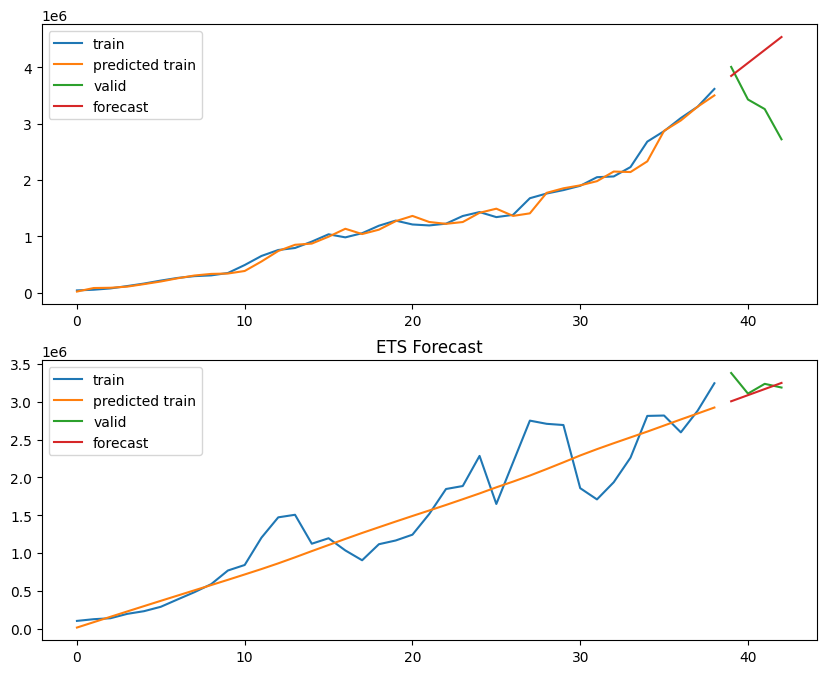

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('ETS Forecast')
ax[0].plot(train['Y20'], label='train')
ax[0].plot(ets_y20_aan_fit.fittedvalues, label='predicted train')
ax[0].plot(valid['Y20'], label='valid')
ax[0].plot(val_y20_aan, label='forecast')
ax[0].legend()
ax[1].plot(train['Y152'], label='train')
ax[1].plot(ets_y152_aan_fit.fittedvalues, label='predicted train')
ax[1].plot(valid['Y152'], label='valid')
ax[1].plot(val_y152_aan, label='forecast')
ax[1].legend()
plt.show()

In [32]:
# calculate MAE
y20_aan_forecast_mae = mean_absolute_error(valid['Y20'], val_y20_aan)
y152_aan_forecast_mae = mean_absolute_error(valid['Y152'], val_y152_aan)

In [33]:
print('Y20 AAN forecast MAE: ', y20_aan_forecast_mae)
print('Y152 AAN forecast MAE: ', y152_aan_forecast_mae)

Y20 AAN forecast MAE:  918286.0525288042
Y152 AAN forecast MAE:  131010.55474992911


In [34]:
print('Y20 AAN forecast MAPE: ', mape(valid['Y20'], val_y20_aan))
print('Y152 AAN forecast MAPE: ', mape(valid['Y152'], val_y152_aan))

Y20 AAN forecast MAPE:  30.44278674044132
Y152 AAN forecast MAPE:  3.9396329701272235


In [35]:
print('Y20 AAN train MAPE: ', mape(train['Y20'], ets_y20_aan_fit.fittedvalues))
print('Y152 AAN train MAPE: ', mape(train['Y152'], ets_y152_aan_fit.fittedvalues))

Y20 AAN train MAPE:  8.366133992235394
Y152 AAN train MAPE:  19.626974305605685


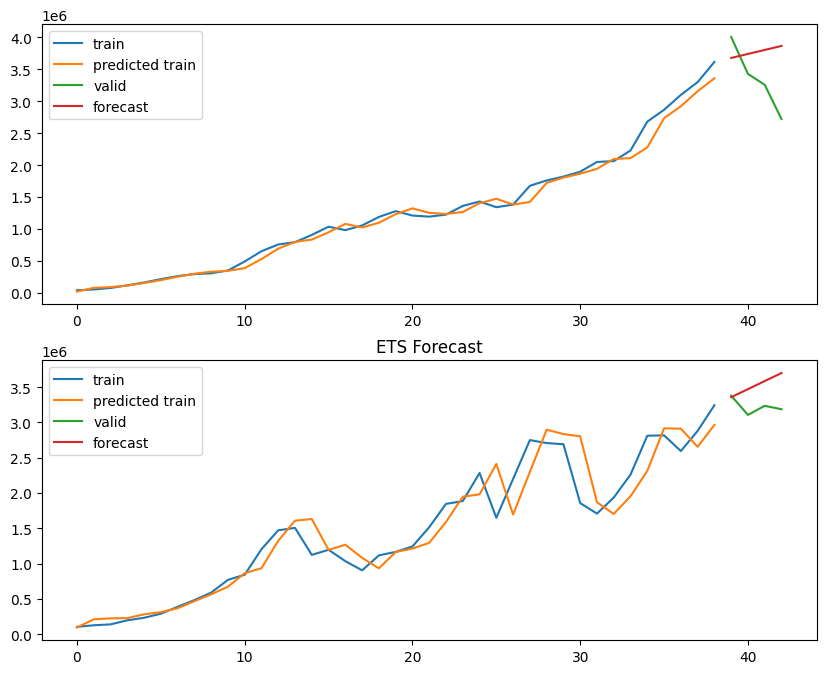

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('ETS Forecast')
ax[0].plot(train['Y20'], label='train')
ax[0].plot(ets_y20_man_fit.fittedvalues, label='predicted train')
ax[0].plot(valid['Y20'], label='valid')
ax[0].plot(val_y20_man, label='forecast')
ax[0].legend()
ax[1].plot(train['Y152'], label='train')
ax[1].plot(ets_y152_man_fit.fittedvalues, label='predicted train')
ax[1].plot(valid['Y152'], label='valid')
ax[1].plot(val_y152_man, label='forecast')
ax[1].legend()
plt.show()

In [37]:
# calculate MAE
y20_man_forecast_mae = mean_absolute_error(valid['Y20'], val_y20_man)
y152_man_forecast_mae = mean_absolute_error(valid['Y152'], val_y152_man)

In [38]:
print('Y20 MAN forecast MAE: ', y20_man_forecast_mae)
print('Y152 MAN forecast MAE: ', y152_man_forecast_mae)

Y20 MAN forecast MAE:  582986.5465799284
Y152 MAN forecast MAE:  312570.7685220374


In [39]:
print('Y20 MAN forecast MAPE: ', mape(valid['Y20'], val_y20_man))

Y20 MAN forecast MAPE:  19.028977818772326


In [40]:
print('Y152 MAN forecast MAPE: ', mape(valid['Y152'], val_y152_man))

Y152 MAN forecast MAPE:  9.828943001440587


In [41]:
print('Y20 MAN train MAPE: ', mape(train['Y20'], ets_y20_man_fit.fittedvalues))
print('Y152 MAN train MAPE: ', mape(train['Y152'], ets_y152_man_fit.fittedvalues))

Y20 MAN train MAPE:  8.6977895555275
Y152 MAN train MAPE:  16.244701100333746


### 7

In [42]:
naive_y20_wconst = [naive_y20.iloc[i]*pow(1+6/100, i+1) for i in range(len(naive_y20))]

In [43]:
naive_y152_wconst = [naive_y152.iloc[i]*pow(1+6/100, i+1) for i in range(len(naive_y152))]

In [44]:
naive_y20_wconst

[3833882.2, 4063915.1320000007, 4307750.03992, 4566215.042315201]

In [45]:
naive_y152_wconst

[3438714.2, 3645037.0520000006, 3863739.2751200004, 4095563.631627201]

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model_l_y20 = LinearRegression()
model_l_y20.fit(np.arange(0,39).reshape(-1,1), np.array(train['Y20']))

LinearRegression()

In [48]:
ypred_l_y20 = model_l_y20.predict(np.arange(39,43).reshape(-1,1))
print(ypred_l_y20)

[2868773.95276653 2949084.90681512 3029395.8608637  3109706.81491228]


In [49]:
model_l_y152 = LinearRegression()
model_l_y152.fit(np.arange(0,39).reshape(-1,1), np.array(train['Y152']))

LinearRegression()

In [50]:
ypred_l_y152 = model_l_y152.predict(np.arange(39,43).reshape(-1,1))
print(ypred_l_y152)

[2998495.83130904 3074346.58313091 3150197.33495277 3226048.08677463]


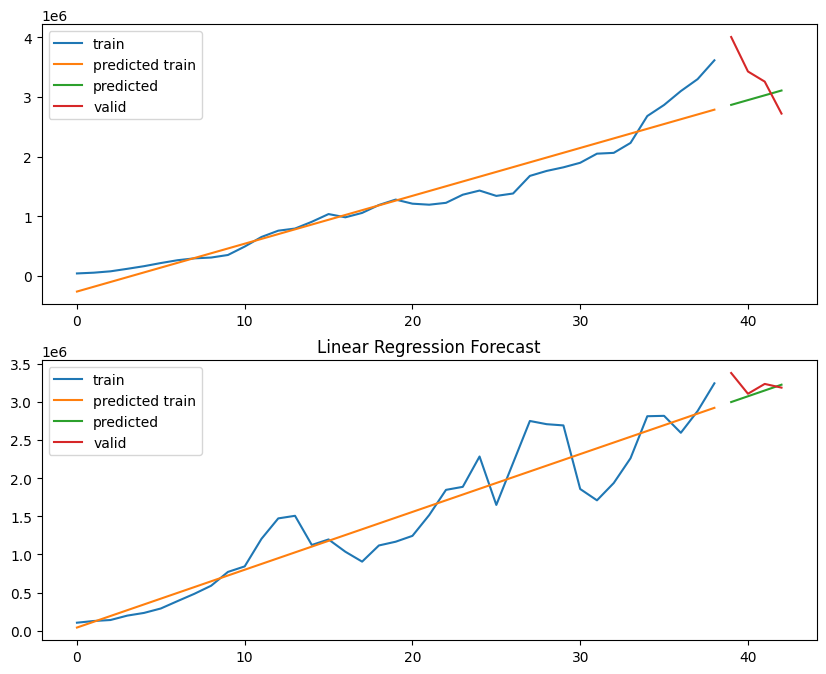

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('Linear Regression Forecast')
ax[0].plot(train['Y20'], label='train')
ax[0].plot(model_l_y20.predict(np.arange(0,39).reshape(-1,1)), label = 'predicted train')
ax[0].plot(np.arange(39,43), ypred_l_y20, label = 'predicted')
ax[0].plot(np.arange(39,43), valid['Y20'], label = 'valid')
ax[0].legend()
ax[1].plot(train['Y152'], label='train')
ax[1].plot(model_l_y152.predict(np.arange(0,39).reshape(-1,1)), label = 'predicted train')
ax[1].plot(np.arange(39,43), ypred_l_y152, label = 'predicted')
ax[1].plot(np.arange(39,43), valid['Y152'], label = 'valid')
ax[1].legend()
plt.show()

In [52]:
# calculate MAPE
y20_forecast_mape = mape(valid['Y20'], ypred_l_y20)
y152_forecast_mape = mape(valid['Y152'], ypred_l_y152)
y20_train_mape = mape(train['Y20'], model_l_y20.predict(np.arange(0,39).reshape(-1,1)))
y152_train_mape = mape(train['Y152'], model_l_y152.predict(np.arange(0,39).reshape(-1,1)))

In [53]:
print('Y20 forecast MAPE: ', y20_forecast_mape)
print('Y152 forecast MAPE: ', y152_forecast_mape)
print('Y20 train MAPE: ', y20_train_mape)
print('Y152 train MAPE: ', y152_train_mape)

Y20 forecast MAPE:  15.923594602390862
Y152 forecast MAPE:  4.0526166080866375
Y20 train MAPE:  53.10271631651741
Y152 train MAPE:  20.682495204321192


In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly_model_l_y20 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model_l_y20.fit(np.arange(0,39).reshape(-1,1), np.array(train['Y20']))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [56]:
poly_ypred_l_y20 = poly_model_l_y20.predict(np.arange(39,43).reshape(-1,1))
print(poly_ypred_l_y20)

[3725976.47609194 3995544.36130917 4283223.78746194 4589719.47641631]


In [57]:
poly_model_l_y152 = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
poly_model_l_y152.fit(np.arange(0,39).reshape(-1,1), np.array(train['Y152']))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [58]:
poly_ypred_l_y152 = poly_model_l_y152.predict(np.arange(39,43).reshape(-1,1))
print(poly_ypred_l_y152)

[3048423.64006556 3141793.57109379 3237485.90226275 3335617.12611476]


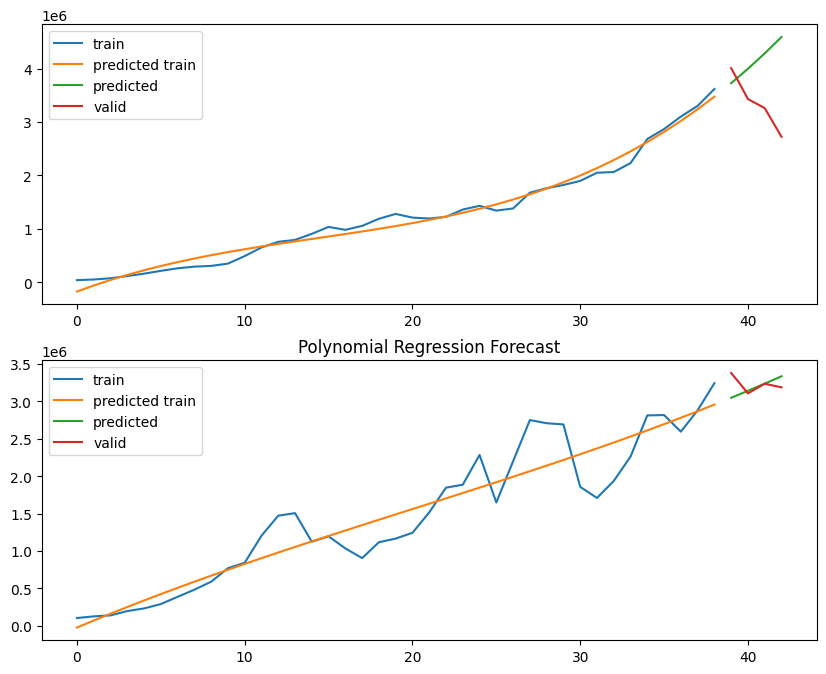

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.title('Polynomial Regression Forecast')
ax[0].plot(train['Y20'], label='train')
ax[0].plot(poly_model_l_y20.predict(np.arange(0,39).reshape(-1,1)), label = 'predicted train')
ax[0].plot(np.arange(39,43), poly_ypred_l_y20, label = 'predicted')
ax[0].plot(np.arange(39,43), valid['Y20'], label = 'valid')
ax[0].legend()
ax[1].plot(train['Y152'], label='train')
ax[1].plot(poly_model_l_y152.predict(np.arange(0,39).reshape(-1,1)), label = 'predicted train')
ax[1].plot(np.arange(39,43), poly_ypred_l_y152, label = 'predicted')
ax[1].plot(np.arange(39,43), valid['Y152'], label = 'valid')
ax[1].legend()
plt.show()

In [60]:
poly_y20_forecast_mape = mape(valid['Y20'], poly_ypred_l_y20)
poly_y152_forecast_mape = mape(valid['Y152'], poly_ypred_l_y152)
poly_y20_train_mape = mape(train['Y20'], poly_model_l_y20.predict(np.arange(0,39).reshape(-1,1)))
poly_y152_train_mape = mape(train['Y152'], poly_model_l_y152.predict(np.arange(0,39).reshape(-1,1)))

In [61]:
print('Y20 forecast MAPE: ', poly_y20_forecast_mape)
print('Y152 forecast MAPE: ', poly_y152_forecast_mape)
print('Y20 train MAPE: ', poly_y20_train_mape)
print('Y152 train MAPE: ', poly_y152_train_mape)

Y20 forecast MAPE:  30.881623285928317
Y152 forecast MAPE:  3.8960369932704144
Y20 train MAPE:  33.45099486618419
Y152 train MAPE:  22.378885855879773
